In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def load_feature_store_dataset(file_path):
    wafers = pd.read_csv(file_path)
    return wafers

In [5]:
file_path = r"D:/NCI Assignments/DAPA/wafer_23012020_041211.csv"
wafers = load_feature_store_dataset(file_path)
print("Shape of the feature store dataset:", wafers.shape)
print(wafers.head())

Shape of the feature store dataset: (101, 592)
  Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  \
0  Wafer-801   2968.33   2476.58  2216.7333  1748.0885    1.1127     100.0   
1  Wafer-802   2961.04   2506.43  2170.0666  1364.5157    1.5447     100.0   
2  Wafer-803   3072.03   2500.68  2205.7445  1363.1048    1.0518     100.0   
3  Wafer-804   3021.83   2419.83  2205.7445  1363.1048    1.0518     100.0   
4  Wafer-805   3006.95   2435.34  2189.8111  1084.6502    1.1993     100.0   

   Sensor-7  Sensor-8  Sensor-9  ...  Sensor-582  Sensor-583  Sensor-584  \
0   97.5822    0.1242    1.5300  ...         NaN      0.5004      0.0120   
1   96.7700    0.1230    1.3953  ...         NaN      0.4994      0.0115   
2  101.8644    0.1220    1.3896  ...         NaN      0.4987      0.0118   
3  101.8644    0.1220    1.4108  ...         NaN      0.4934      0.0123   
4  104.8856    0.1234    1.5094  ...         NaN      0.4987      0.0145   

   Sensor-585  Sensor-586  

In [6]:
from sklearn.model_selection import train_test_split

def load_feature_store_dataset(file_path):
    wafers = pd.read_csv(file_path)
    return wafers

In [7]:
wafers = load_feature_store_dataset(file_path)
wafers_train, wafers_test = train_test_split(wafers, test_size=0.2, random_state=42)
print("Shape of the training dataset:", wafers_train.shape)
print("Shape of the testing dataset:", wafers_test.shape)

Shape of the training dataset: (80, 592)
Shape of the testing dataset: (21, 592)


In [8]:
wafers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 467.3+ KB


In [9]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,100.000000,101.000000,98.000000,98.000000,98.000000,98.0,98.000000,98.000000,101.000000,101.000000,...,34.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3017.993400,2485.921485,2202.189353,1490.754698,1.185049,100.0,97.363236,0.122218,1.461697,0.000286,...,74.331709,0.499322,0.013624,0.003551,2.729488,0.023375,0.014840,0.004676,77.795167,-0.881188
std,71.790535,67.809173,30.194475,462.949098,0.350921,0.0,5.589615,0.002009,0.070966,0.010566,...,41.857728,0.003482,0.004323,0.000869,0.871736,0.012008,0.007528,0.002515,54.952461,0.475124
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.300000,2445.200000,2189.966700,1111.543600,0.839150,100.0,94.974725,0.120800,1.408000,-0.006800,...,47.356000,0.497300,0.011300,0.003100,2.276400,0.013400,0.009500,0.002700,33.787600,-1.000000
50%,3005.360000,2493.030000,2200.988900,1254.730700,1.159450,100.0,99.402750,0.122250,1.454200,0.001200,...,65.127550,0.499400,0.012800,0.003400,2.554900,0.021800,0.013900,0.003800,65.036500,-1.000000
75%,3071.295000,2527.200000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507100,0.008100,...,99.419050,0.501500,0.014700,0.003800,2.949800,0.028000,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [10]:
value_counts = wafers["Good/Bad"].value_counts()

# Analysis of Missing Data

In [11]:
wafers["Good/Bad"].isna().sum()

0

In [12]:
wafers.isna().sum().sum() 

2338

In [13]:
total_missing_values = wafers.isna().sum().sum()
total_cells = wafers.shape[0] * (wafers.shape[1] - 1)
missing_value_percentage = total_missing_values / total_cells
print("Percentage of missing values:", missing_value_percentage)

Percentage of missing values: 0.03916838384346049


# Visualisation of the features

In [14]:
mylist = [1, 2, 3, 4, 5]
for i in enumerate(mylist):
    print(i)

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)


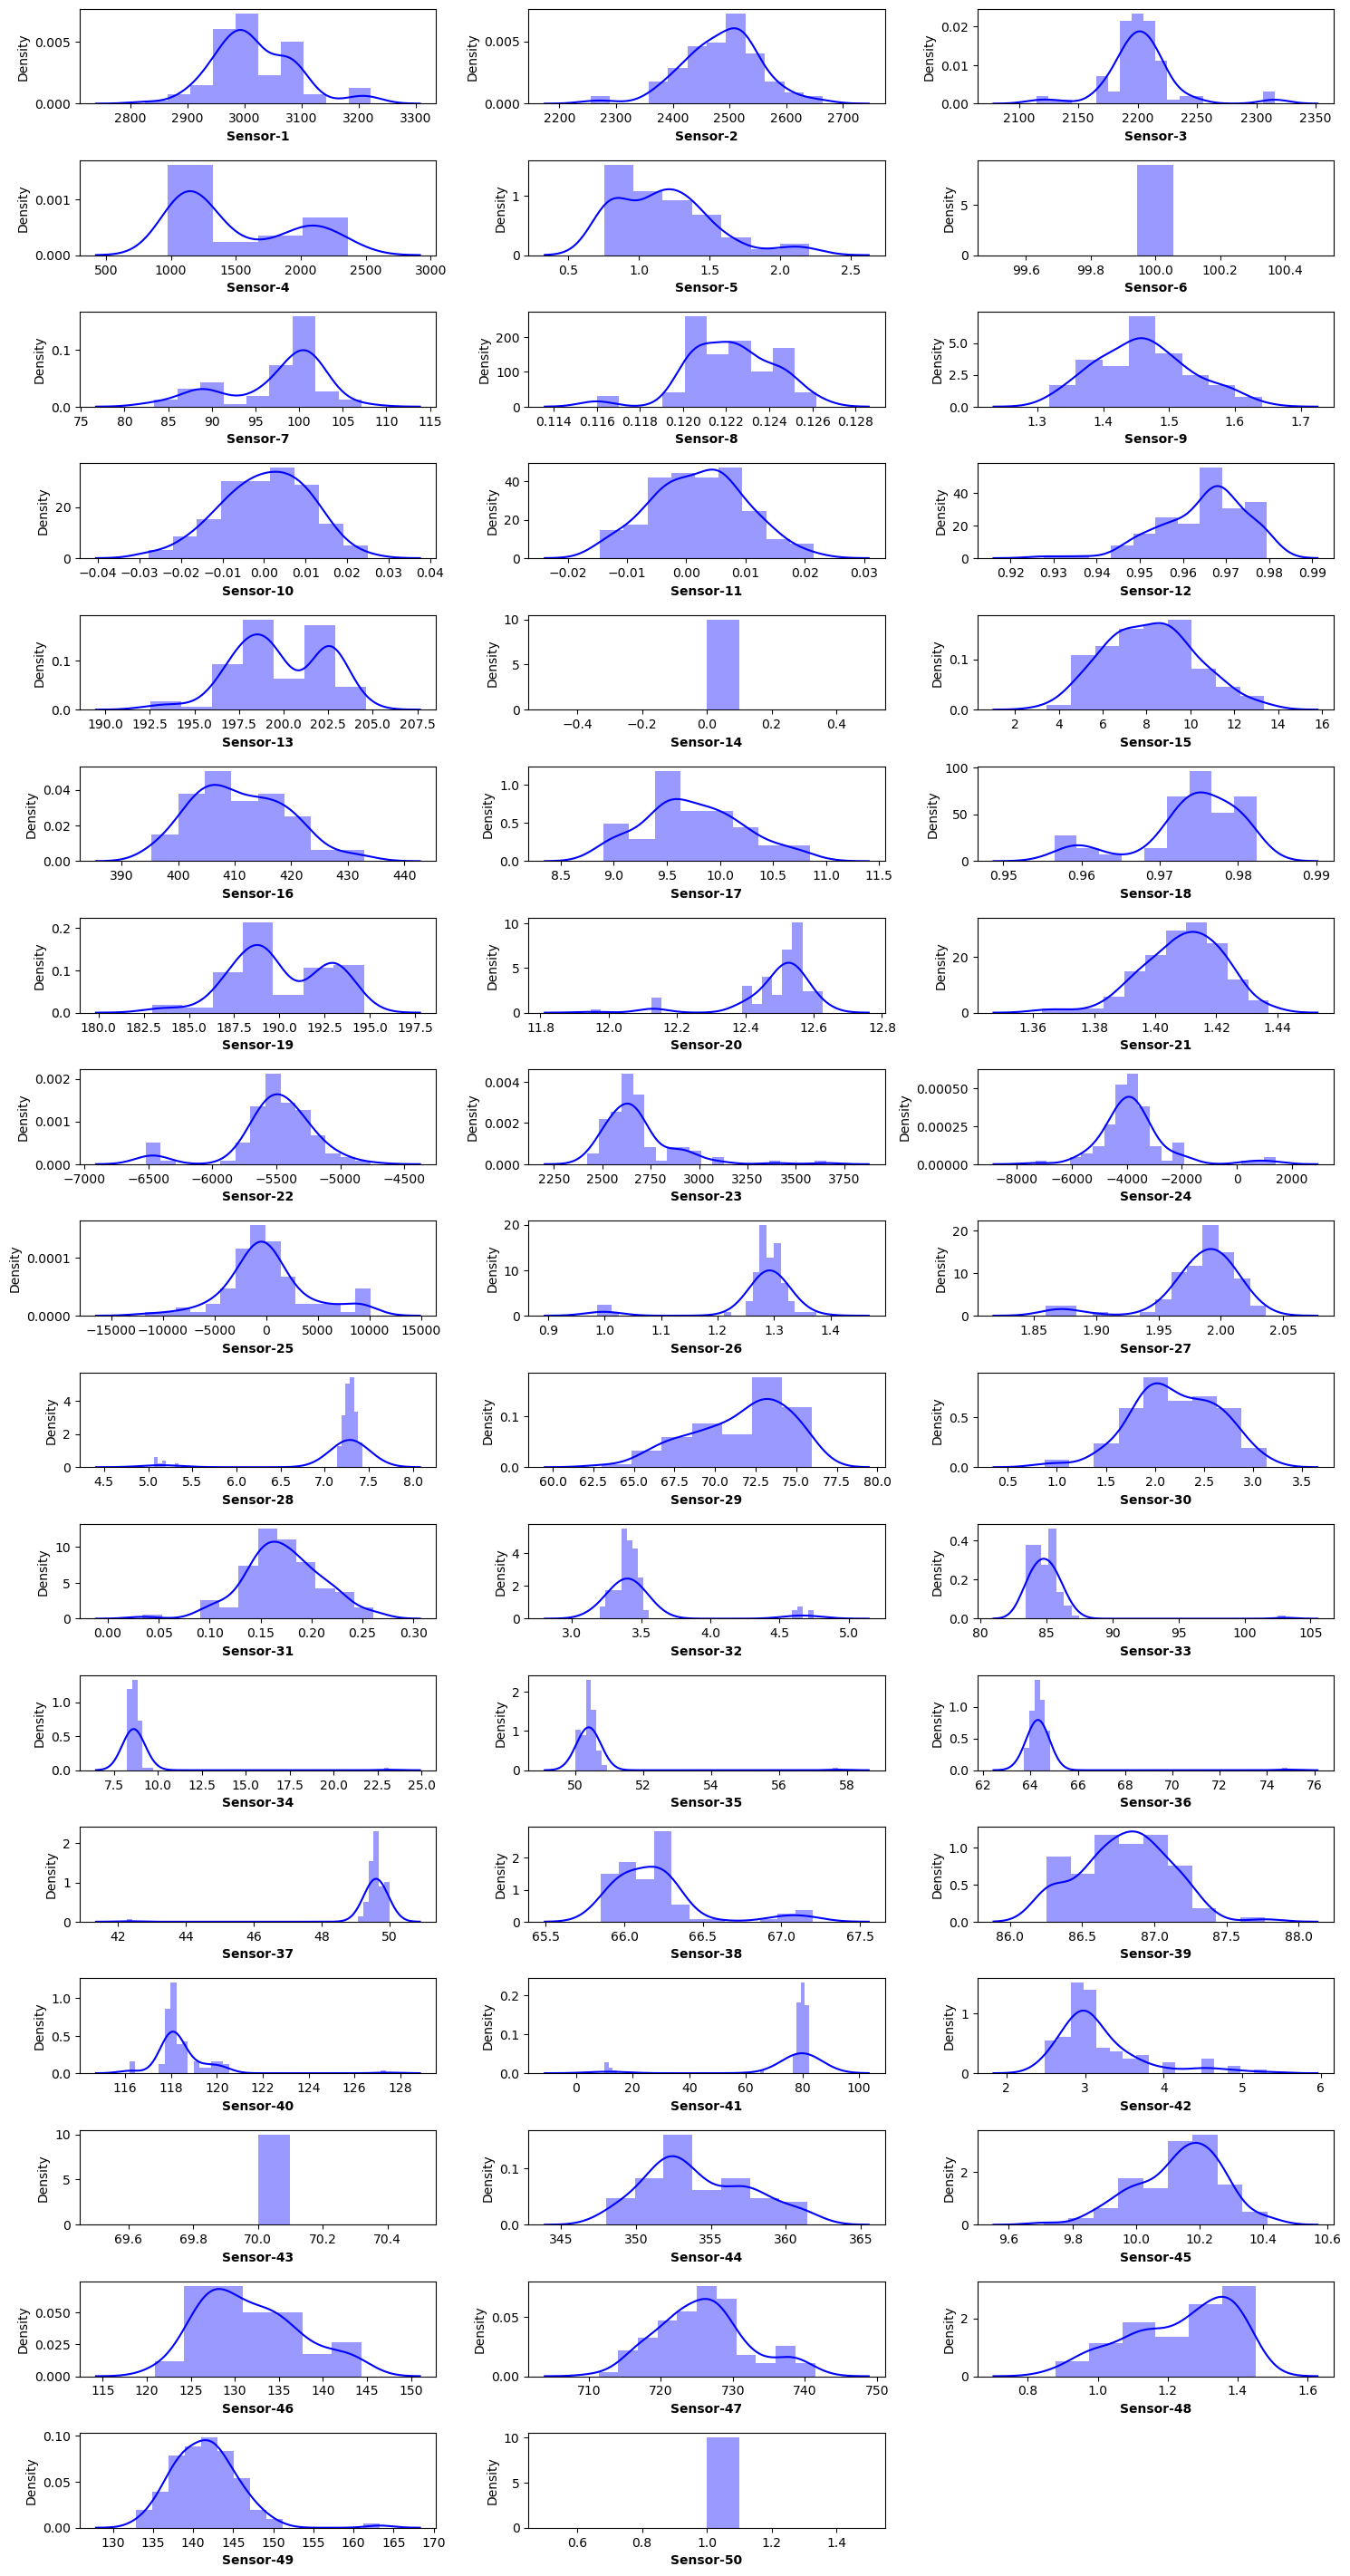

In [15]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='blue')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [16]:
import random

# Select 50 random sensors
random_50_sensors_idx = random.sample(range(1, 591), 50)

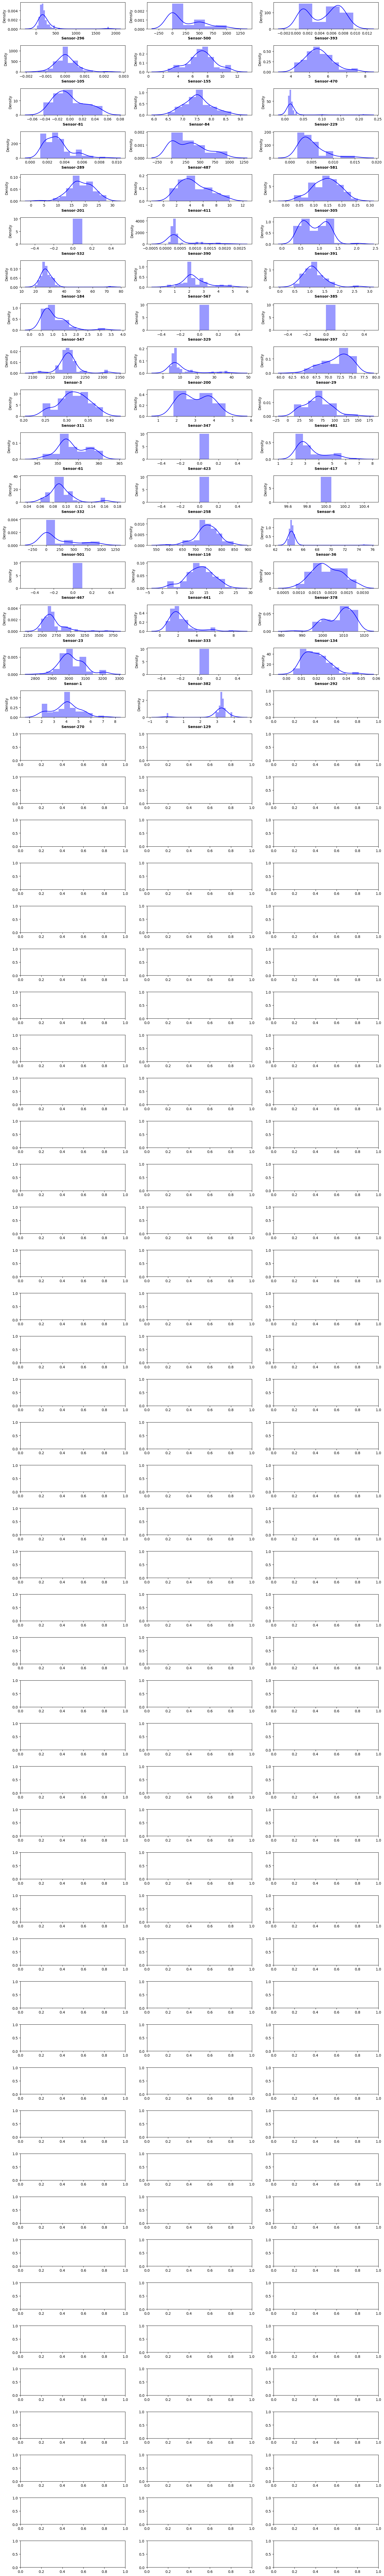

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and create subplots
fig, axes = plt.subplots(60, 3, figsize=(15, 100))

# Flatten the axes array
axes = axes.flatten()

# Plot the distributions
for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    sns.distplot(x=wafers[col], color='blue', ax=axes[i])
    axes[i].set_xlabel(col, weight='bold')

# Adjust the layout
plt.tight_layout()


In [18]:
wafers.isna().sum()


Unnamed: 0    0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [19]:
wafers.shape

(101, 592)

In [20]:
wafers.shape[0]

101

In [21]:
wafers.isna().sum().div(wafers.shape[0])>.7

Unnamed: 0    False
Sensor-1      False
Sensor-2      False
Sensor-3      False
Sensor-4      False
              ...  
Sensor-587    False
Sensor-588    False
Sensor-589    False
Sensor-590    False
Good/Bad      False
Length: 592, dtype: bool

In [22]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):

    zero_std_dev_cols = [col for col in df.columns if df[col].dtype != 'O' and df[col].std() == 0]
    return zero_std_dev_cols

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):

    cols_to_drop = df.columns[df.isna().mean() > missing_thresh].tolist()
    return cols_to_drop


In [23]:
cols_to_drop_1 = get_redundant_cols(wafers, missing_thresh=.7)
print(cols_to_drop_1)

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']


In [24]:
cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [25]:
cols_to_drop = cols_to_drop_1 + cols_to_drop_2
cols_to_drop

['Sensor-158',
 'Sensor-159',
 'Sensor-293',
 'Sensor-294',
 'Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Se

In [26]:
wafers.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [27]:
X = wafers.drop(cols_to_drop, axis=1)
y = wafers[["Good/Bad"]]

In [28]:
X

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,90.1144,0.1160,1.4695,0.0071,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
97,Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,101.5122,0.1224,1.3603,-0.0031,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
98,Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,1.4493,-0.0194,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1
99,Wafer-900,2914.86,2465.11,2210.2778,2120.5760,1.0700,95.1089,0.1230,1.5817,0.0118,...,NaN,0.5026,0.0121,0.0032,2.4064,0.0153,0.0048,0.0017,31.0176,1


In [29]:
y

,Good/Bad
0,-1
1,1
2,-1
3,-1
4,-1
...,...
96,1
97,-1
98,-1
99,1


In [30]:
print("Shape of the features now:", X.shape)
print(X.head())

Shape of the features now: (101, 466)
  Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-7  \
0  Wafer-801   2968.33   2476.58  2216.7333  1748.0885    1.1127   97.5822   
1  Wafer-802   2961.04   2506.43  2170.0666  1364.5157    1.5447   96.7700   
2  Wafer-803   3072.03   2500.68  2205.7445  1363.1048    1.0518  101.8644   
3  Wafer-804   3021.83   2419.83  2205.7445  1363.1048    1.0518  101.8644   
4  Wafer-805   3006.95   2435.34  2189.8111  1084.6502    1.1993  104.8856   

   Sensor-8  Sensor-9  Sensor-10  ...  Sensor-582  Sensor-583  Sensor-584  \
0    0.1242    1.5300    -0.0279  ...         NaN      0.5004      0.0120   
1    0.1230    1.3953     0.0084  ...         NaN      0.4994      0.0115   
2    0.1220    1.3896     0.0138  ...         NaN      0.4987      0.0118   
3    0.1220    1.4108    -0.0046  ...         NaN      0.4934      0.0123   
4    0.1234    1.5094    -0.0046  ...         NaN      0.4987      0.0145   

   Sensor-585  Sensor-586  Sen

In [31]:
print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (101, 1)


,Good/Bad
0,-1
1,1
2,-1
3,-1
4,-1


# Transformation of the data

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# Create an imputer object
imputer = KNNImputer(n_neighbors=3)

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(
    steps=[
        ('Imputer', imputer),
        ('Scaler', RobustScaler())
    ]
)

# Return the preprocessing pipeline
preprocessing_pipeline


Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [33]:
X=X.drop("Unnamed: 0",axis=1)

In [34]:
X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set:", X_trans.shape)
print(X_trans)

Shape of transformed features set: (101, 465)
[[-0.36988409 -0.20060976  0.67734164 ...  0.53125    -0.44314749
   0.        ]
 [-0.44466099  0.16341463 -1.33031182 ...  0.53125    -0.44314749
   2.        ]
 [ 0.69381475  0.09329268  0.20459121 ...  0.53125    -0.44314749
   0.        ]
 ...
 [-0.49769207  0.59585366 -0.16379859 ... -0.65625    -0.48242947
   0.        ]
 [-0.9183506  -0.3404878   0.39961883 ... -0.65625    -0.48242947
   2.        ]
 [ 0.84244538 -1.62182927  0.1395777  ...  0.          0.69844347
   0.        ]]


# Clusturing of Data

In [35]:
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self) -> int:
        try:
            print(f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")

            print("WCSS computed successfully for all shortlisted number of clusters!")

            knee_finder = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
            ideal_clusters = knee_finder.knee
            print(f"Ideal number of clusters to be formed: {ideal_clusters}")

            return ideal_clusters
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters, init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
        except Exception as e:
            print(e)
            raise e

In [36]:
cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
WCSS for n_clusters=1: 9781300.67561968
WCSS for n_clusters=2: 2475781.764980524
WCSS for n_clusters=3: 1487797.753844623
WCSS for n_clusters=4: 757773.7776145438
WCSS for n_clusters=5: 419526.678384271
WCSS for n_clusters=6: 321472.996455219
WCSS for n_clusters=7: 262560.28215075284
WCSS for n_clusters=8: 219896.4742256663
WCSS for n_clusters=9: 191053.80408683547
WCSS for n_clusters=10: 149162.1645123198
WCSS computed successfully for all shortlisted number of clusters!
Ideal number of clusters to be formed: 2
Dividing the "wafers features" instances into 2 clusters via KMeans Clustering algorithm..
..said data instances divided into 2 clusters successfully!


array([[-0.36988409, -0.20060976,  0.67734164, ..., -0.44314749,
         0.        ,  0.        ],
       [-0.44466099,  0.16341463, -1.33031182, ..., -0.44314749,
         2.        ,  0.        ],
       [ 0.69381475,  0.09329268,  0.20459121, ..., -0.44314749,
         0.        ,  1.        ],
       ...,
       [-0.49769207,  0.59585366, -0.16379859, ..., -0.48242947,
         0.        ,  0.        ],
       [-0.9183506 , -0.3404878 ,  0.39961883, ..., -0.48242947,
         2.        ,  0.        ],
       [ 0.84244538, -1.62182927,  0.1395777 , ...,  0.69844347,
         0.        ,  0.        ]])

In [37]:
np.unique(X_clus[:, -1])

array([0., 1.])

In [38]:
import numpy as np

## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1_shape = wafers_1.shape

print(wafers_1_shape)


(77, 467)


In [39]:
import numpy as np

## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_2 data
wafers_2_shape = wafers_clus[wafers_clus[:, -2] == 1].shape

print(wafers_2_shape)


(24, 467)


In [40]:
import numpy as np

## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_3 data
wafers_3_shape = wafers_clus[wafers_clus[:, -2] == 2].shape

print(wafers_3_shape)


(0, 467)


# Resampling

In [42]:
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

X, y = X_trans[:, :-1], y

try:
    oversampler = SMOTE(sampling_strategy="auto", k_neighbors=4)
    undersampler = TomekLinks()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    X_res, y_res = undersampler.fit_resample(X_resampled, y_resampled)
except ValueError as e:
    print("An error occurred during resampling: ", str(e))


In [43]:
X_res.shape

(190, 464)

In [44]:
y_res.shape

(190, 1)

In [45]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (101, 465)
After resampling, Shape of training instances:  (190, 465)


In [ ]:
# import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

X, y = X_trans[:, :-1], y

try:
    oversampler = SMOTE(sampling_strategy="auto", k_neighbors=4)
    undersampler = TomekLinks()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    X_res, y_res = undersampler.fit_resample(X_resampled, y_resampled)

    unique_labels = np.unique(y_res)
    value_counts = [len(y_res[y_res == label]) for label in unique_labels]

    print("Unique Labels:", unique_labels)
    print("Value Counts:")
    for label, count in zip(unique_labels, value_counts):
        print(f"{label}: {count}")

except ValueError as e:
    print("An error occurred during resampling:", str(e))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((126, 464), (126, 1))
test set: ((64, 464), (64, 1))


# Model Selection and Training:

In [48]:
X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(126, 464) (126, 1)
(64, 464) (64, 1)


In [50]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/70.9 MB ? eta -:--:--
                                              0.0/70.9 MB ? eta -:--:--
                                              0.0/70.9 MB ? eta -:--:--
                                             0.0/70.9 MB 330.3 kB/s eta 0:03:35
                                             0.1/70.9 MB 804.6 kB/s eta 0:01:29
                                              0.3/70.9 MB 1.6 MB/s eta 0:00:45
                                              0.7/70.9 MB 2.9 MB/s eta 0:00:25
                                              1.0/70.9 MB 4.1 MB/s eta 0:00:17
                                              1.0/70.9 MB 4.1 MB/s eta 0:00:17
                                              1.0/70.9 MB 4.1 MB/s eta 0:00:17
                                              1.0/70.9 MB 4.1 MB/s eta 0:00:17
                                              1.6/70.9 MB 3.3 MB/s eta 0

In [51]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [52]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [54]:
svc_scores = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [55]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)

print("AUC score:", svc_auc)

AUC score: 0.9696969696969697


In [57]:
svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [58]:
display_scores(svc_rbf_scores)

Scores:  [0.92857143 1.         1.         0.92857143 0.92857143 0.85714286
 0.97222222 1.         0.88888889 1.        ]
Mean:  0.9503968253968255
Standard Deviation:  0.04922074802130979


In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)

print("AUC score:", svc_rbf_auc)

AUC score: 0.6363636363636364


In [61]:
random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


In [62]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)

print("AUC score:", random_clf_auc)

AUC score: 1.0
